<a href="https://colab.research.google.com/github/Mukta-glitch/Object_Oriented_Programming/blob/main/Linear_Regression_Retail_Sales_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dataset Source:** #https://www.kaggle.com/datasets/mohammadtalib786/retail-sales-dataset


 **Importing necessary packages**

In [ ]:
import statsmodels.formula.api as sms
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import numpy as np

**Fetching Data and Creating Dataframe**

In [ ]:
# Read the dataset into a DataFrame
url = input('Enter an URL:')
df = pd.read_csv(url)

Enter an URL:/content/retail_sales_dataset.csv


**Data Cleaning and Preprocessing**

In [ ]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [ ]:
df.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [ ]:
df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

***No Null Values***

In [ ]:
#Converting Date to Datetime
df['Date'] = pd.to_datetime(df.Date)
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [ ]:
#Converting Categorical Variables
df['Gender'] = df['Gender'].astype('category')
df['Product Category'] = df['Product Category'].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   category      
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   category      
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
dtypes: category(2), datetime64[ns](1), int64(5), object(1)
memory usage: 57.0+ KB


**Exploratory Data Analysis - Numeric Variables**

In [ ]:
numeric_df = df[['Age','Quantity','Price per Unit','Total Amount']]

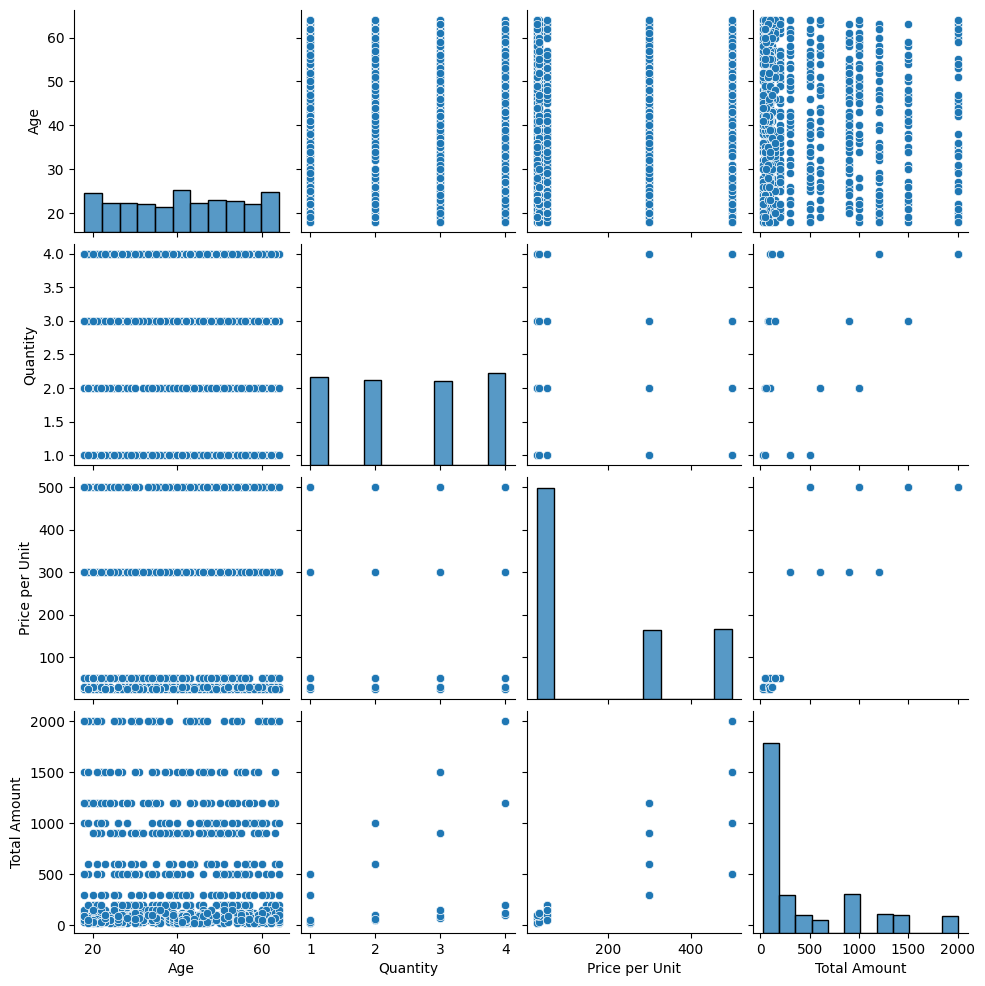

In [ ]:
sns.pairplot(numeric_df)

<ipython-input-12-aeced1e1f3e4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Total Amount'])


<Axes: xlabel='Total Amount', ylabel='Density'>

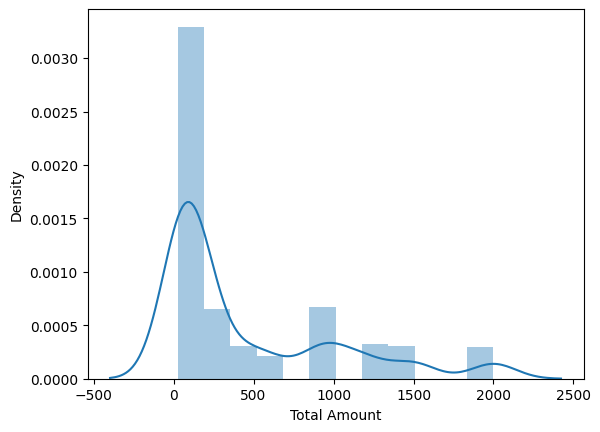

In [ ]:
sns.distplot(df['Total Amount'])

***Left Skewed - Will require normalization***

<Axes: >

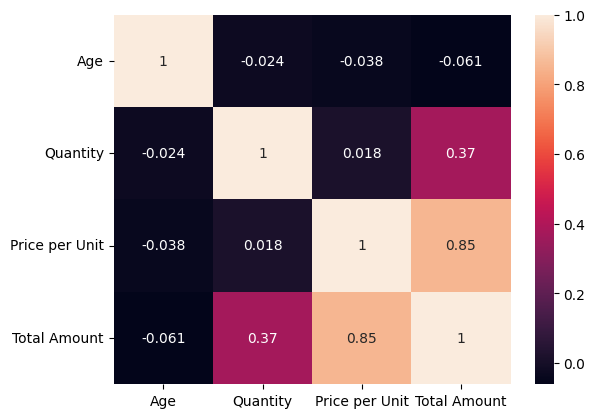

In [ ]:
sns.heatmap(numeric_df.corr(), annot=True)

**Exploratory Data Analysis - Categorical Variables**

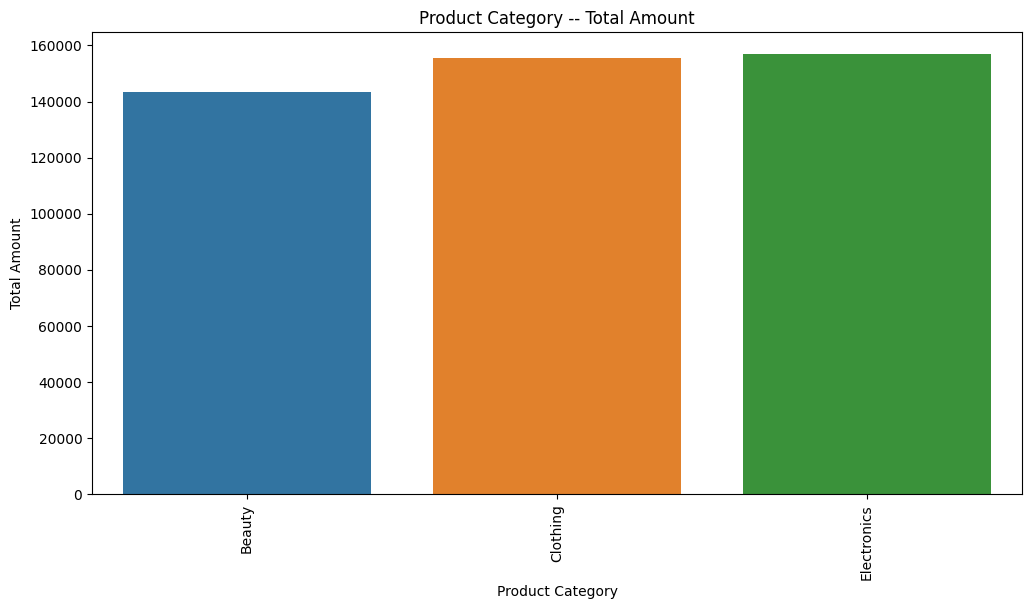

In [ ]:
#Bar Plot
net_wt = df.groupby('Product Category')['Total Amount'].sum()
plt.figure(figsize=(12, 6))
sns.barplot(
    x=net_wt.index,
    y=net_wt.values)
plt.xticks(rotation=90)
plt.title("Product Category -- Total Amount")
plt.xlabel("Product Category")
plt.ylabel("Total Amount")
plt.show()

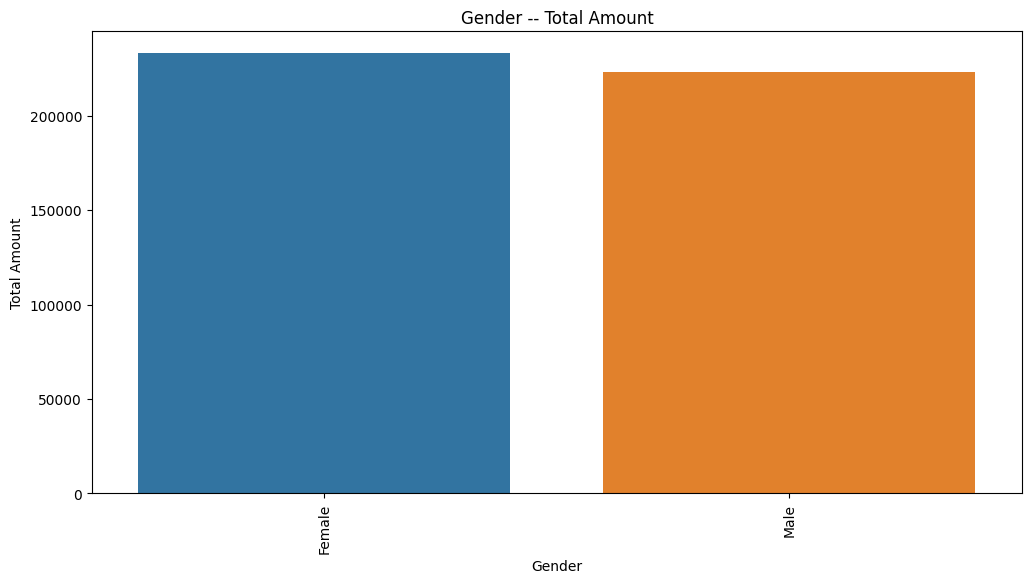

In [ ]:
#Bar Plot
net_wt = df.groupby('Gender')['Total Amount'].sum()
plt.figure(figsize=(12, 6))
sns.barplot(
    x=net_wt.index,
    y=net_wt.values)
plt.xticks(rotation=90)
plt.title("Gender -- Total Amount")
plt.xlabel("Gender")
plt.ylabel("Total Amount")
plt.show()

**Visualizing Sales Over Time**

<function matplotlib.pyplot.show(close=None, block=None)>

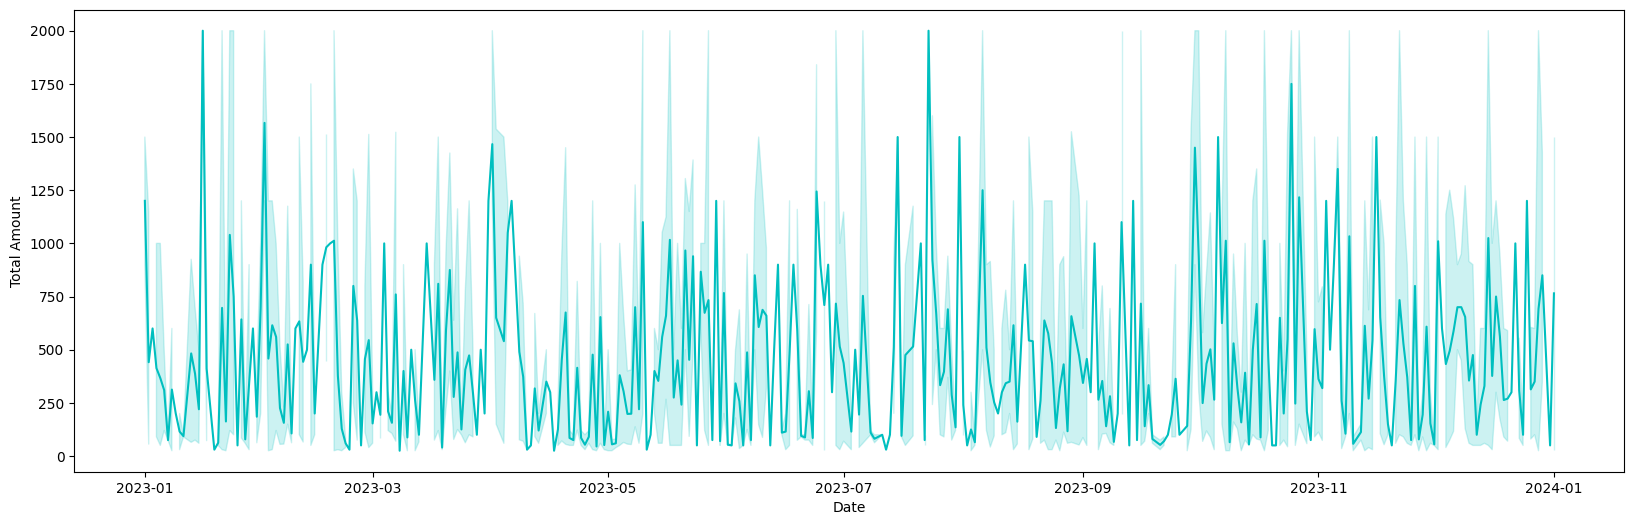

In [ ]:
plt.figure(figsize=(20,6))
sns.lineplot(data=df,x=df['Date'],y=df['Total Amount'],color='c')
plt.show

**Linear Regression using Sklearn (Model Building and Evaluation)**

In [ ]:
#Using only numeric features
X= df[['Age','Quantity','Price per Unit']]
y=df['Total Amount']

In [ ]:
#Transforming Y based on boxcox transformation (for normalization)
from scipy import stats
y_transformed, fitted_lambda = stats.boxcox(y)

<ipython-input-19-92a4594cb6e0>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y)
<ipython-input-19-92a4594cb6e0>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_transformed)


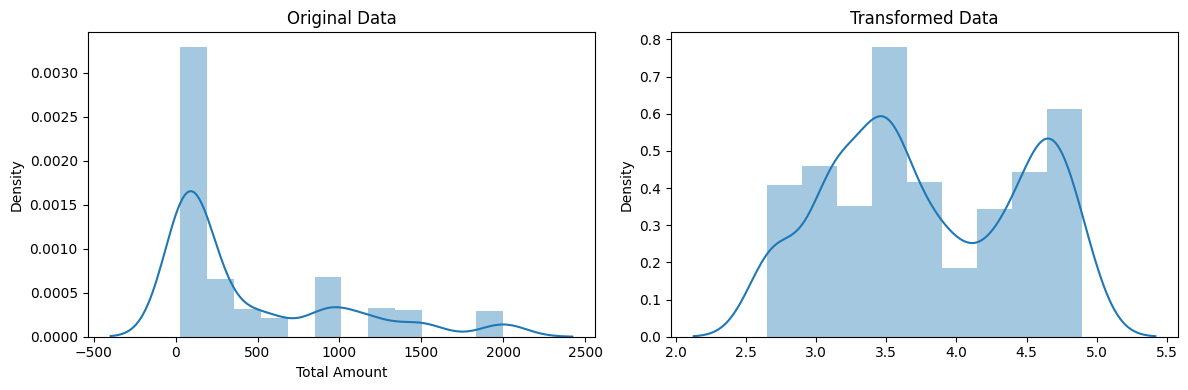

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)  # First subplot
sns.distplot(y)
plt.title('Original Data')

plt.subplot(1, 2, 2)  # Second subplot
sns.distplot(y_transformed)
plt.title('Transformed Data')

plt.tight_layout()  # Ensures that the subplots don't overlap
plt.show()

***Y is more normalized now***

In [ ]:
#Train, Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_transformed, test_size=0.2,random_state=101)

In [ ]:
#creating and training the model
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
# print the intercept
print(model.intercept_)

2.617339383113539


In [ ]:
#Coefficients of the Model
coeff_df = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Age,-0.000094
Quantity,0.247393
Price per Unit,0.003125


**Linear Regression using stats model**

In [ ]:
Y = y_transformed
X = df[['Age','Quantity','Price per Unit']]
Y = pd.DataFrame(Y) #converting Y into a dataframe

In [ ]:
M = pd.concat([Y, X], axis=1)

model1 = sms.ols('Y ~ X', data=M).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     4269.
Date:                Mon, 30 Oct 2023   Prob (F-statistic):               0.00
Time:                        17:13:18   Log-Likelihood:                 269.55
No. Observations:                1000   AIC:                            -531.1
Df Residuals:                     996   BIC:                            -511.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.6147      0.024    110.005      0.0

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming you have already defined and fitted your 'model1' using your data

# Create a DataFrame containing the variables used in your model
model_data = df[['Total Amount','Transaction ID', 'Age','Quantity','Price per Unit']]

# Extract the independent variables (X) from the DataFrame
independent_variables = X

# Add a constant (intercept) to the independent variables
independent_variables = sm.add_constant(independent_variables)

# Calculate the VIF for each independent variable
vif = pd.DataFrame()
vif["Variable"] = independent_variables.columns
vif["VIF"] = [variance_inflation_factor(independent_variables.values, i) for i in range(independent_variables.shape[1])]

print(vif)


         Variable        VIF
0           const  16.477011
1             Age   1.002012
2        Quantity   1.000840
3  Price per Unit   1.001755


***No cause of concern for Multicollinearity***





**Predictions and Regression Analysis Metrics**

In [ ]:
predictions = model.predict(X_test)

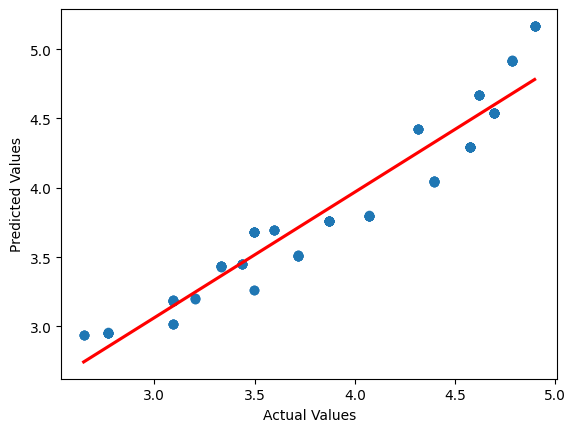

In [ ]:
# Create a scatter plot with a 45-degree fit line
sns.regplot(x=y_test, y=predictions, ci=None, line_kws={"color": "red"})

# Label the axes
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

# Show the plot
plt.show()


In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.1691938527804391
MSE: 0.036891903638035226
RMSE: 0.1920726519784512


**Conclusion:**

The R-squared is very high at 0.928, meaning 92.8% of the variation in
transformed Total Amount is explained by this model. The model fits the data very well overall.

The F-statistic is large and significant, indicating the overall model is statistically significant.

The coefficient for 'Age' is close to zero (-0.0000001571) and not statistically significant (p=0.997). This indicates age has no linear relationship with transformed Total Amount when controlling for the other variables.

The coefficient for 'Quantity' is positive (0.2477) and highly significant (p=0.000). This indicates that for a 1 unit increase in Quantity, the transformed Total Amount increases by 0.2477 units on average, holding other variables constant.

The coefficient for 'Price per Unit' is positive (0.0031) and highly significant (p=0.000). This means a 1 unit increase in Price per Unit is associated with a 0.0031 unit increase in transformed Total Amount, on average.

There are some non-normality issues looking at the residuals, but no major issues with heteroscedasticity or multicollinearity (since VIF for all variables is less than 5).

The interpretation of the coefficients is similar to linear regression, but we must remember Total Amount was transformed using Box-Cox. To get actual effects on the original scale, we would need to inverse transform the predictions.

Overall, this transformed model indicates Quantity and Price per Unit both have statistically significant positive relationships with Total Amount, while Age does not. The model fits the data very well.